# 実践応用（１）

タイタニックデータセットを利用の利用

一例として、継承のダミー変数を作る


データセットに対しての解説は下記サイトが参考になった。

https://atmarkit.itmedia.co.jp/ait/articles/2007/02/news016.html

In [15]:
from sklearn.datasets import fetch_openml
import pandas as pd
import plotly.express as px

In [2]:
titanic = fetch_openml(data_id=40945, as_frame=True)

/WORK/trash_code/autoGluon/autogluon/lib/python3.8/site-packages/sklearn/datasets/_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [23]:
print (type(titanic))
print(type(titanic['data']))
print("")
#pd.DataFrame(titanic)
for i in titanic:
    print (i, " ", type(titanic[i]))

# 撮ってきた情報の確認
print(titanic['feature_names'])
print(titanic['target_names'])
print(titanic['frame'].columns.values)
print(titanic['frame'].index)

# データフレームだけ取り出し、以下２列をおとす
df=titanic['frame']
df=df.drop(['body','boat'],axis=1)
df

<class 'sklearn.utils._bunch.Bunch'>
<class 'pandas.core.frame.DataFrame'>

data   <class 'pandas.core.frame.DataFrame'>
target   <class 'pandas.core.series.Series'>
frame   <class 'pandas.core.frame.DataFrame'>
categories   <class 'NoneType'>
feature_names   <class 'list'>
target_names   <class 'list'>
DESCR   <class 'str'>
details   <class 'dict'>
url   <class 'str'>
['pclass', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket', 'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest']
['survived']
['pclass' 'survived' 'name' 'sex' 'age' 'sibsp' 'parch' 'ticket' 'fare'
 'cabin' 'embarked' 'boat' 'body' 'home.dest']
RangeIndex(start=0, stop=1309, step=1)


,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,home.dest
0,1.0,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,"St Louis, MO"
1,1.0,1,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,"Montreal, PQ / Chesterville, ON"
2,1.0,0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,"Montreal, PQ / Chesterville, ON"
3,1.0,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,"Montreal, PQ / Chesterville, ON"
4,1.0,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3.0,0,"Zabour, Miss. Hileni",female,14.5000,1.0,0.0,2665,14.4542,NaN,C,NaN
1305,3.0,0,"Zabour, Miss. Thamine",female,NaN,1.0,0.0,2665,14.4542,NaN,C,NaN
1306,3.0,0,"Zakarian, Mr. Mapriededer",male,26.5000,0.0,0.0,2656,7.2250,NaN,C,NaN
1307,3.0,0,"Zakarian, Mr. Ortin",male,27.0000,0.0,0.0,2670,7.2250,NaN,C,NaN


In [ ]:
# 男女別のダミー変数をつくる
df['sex_male']=df['sex'] == "male"
df['sex_female']=df['sex'] == "female"
df

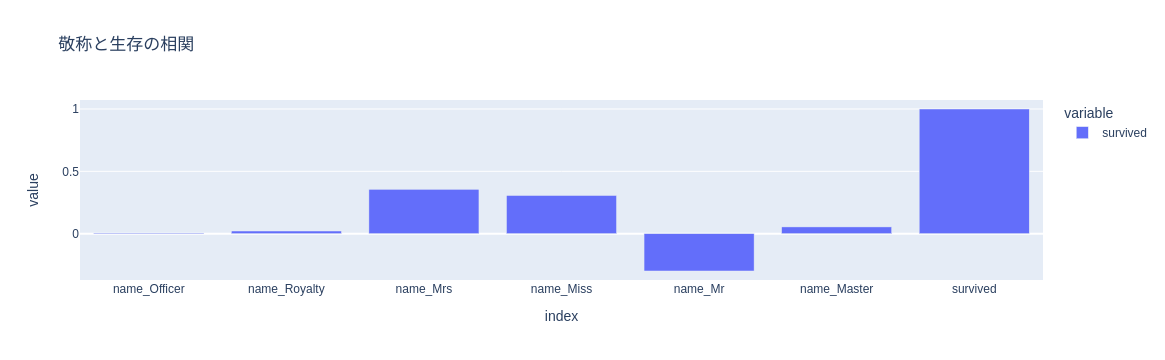

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,home.dest,name_Officer,name_Royalty,name_Mrs,name_Miss,name_Mr,name_Master
0,1.0,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,"St Louis, MO",False,False,False,True,False,False
1,1.0,1,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,"Montreal, PQ / Chesterville, ON",False,False,False,False,False,True
2,1.0,0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,"Montreal, PQ / Chesterville, ON",False,False,False,True,False,False
3,1.0,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,"Montreal, PQ / Chesterville, ON",False,False,False,False,True,False
4,1.0,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,"Montreal, PQ / Chesterville, ON",False,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3.0,0,"Zabour, Miss. Hileni",female,14.5000,1.0,0.0,2665,14.4542,NaN,C,NaN,False,False,False,True,False,False
1305,3.0,0,"Zabour, Miss. Thamine",female,NaN,1.0,0.0,2665,14.4542,NaN,C,NaN,False,False,False,True,False,False
1306,3.0,0,"Zakarian, Mr. Mapriededer",male,26.5000,0.0,0.0,2656,7.2250,NaN,C,NaN,False,False,False,False,True,False
1307,3.0,0,"Zakarian, Mr. Ortin",male,27.0000,0.0,0.0,2670,7.2250,NaN,C,NaN,False,False,False,False,True,False


In [21]:
# 名前の敬称べつでダミー変数をつくる
sdf=df
l=[]

# 敬称を適当に分類する
honorifics = {
    'Officer' : ['Capt', 'Col', 'Major', 'Dr', 'Rev'],
    'Royalty' : ['Don', 'Sir', 'the Countess', 'Dona', 'Lady'],
    'Mrs'     : ['Mme', 'Ms', 'Mrs'],
    'Miss'    : ['Mlle', 'Miss'],
    'Mr'      : ['Mr'],
    'Master'  : ['Master','Jonkheer']
}

# 上のdictをもとにダミー変数を作成
for h in honorifics:
        sdf['name_' + h] = sdf['name'].str.contains('|'.join(honorifics[h]))
        l.append('name_' + h)
l.append('survived')
sdf[l].corr().loc['survived']

# グラフプロット
# mrs. miss. master.などに正の相関が見て取れ、逆にMr.は負の相関があることがわかる
fig=px.bar(sdf[l].corr().loc['survived'],title="敬称と生存の相関").show()       
sdf[l].corr()

sdf